# **Hand Written digits detection using Convolutional Neural Network**

## **Imports**

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

## **Loading MNIST Dataset**

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Data Normalizaton**
* Scaling the data to be between 0 and 1.

In [5]:
X_train, X_test = X_train/255.0, X_test/255.0

## **Flatting the Data**
* Making the data flat which means make with one dimension.

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

## **Building the CNN Classifire**

### **Setting the model parameters and hidden layers**

In [7]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10, activation='softmax')
]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **Training the model**

In [8]:
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.9097 - loss: 0.3001
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9859 - loss: 0.0476
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.9917 - loss: 0.0274
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - accuracy: 0.9931 - loss: 0.0215
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9953 - loss: 0.0139


### **Model Evaluation**

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: ', test_acc, "\nTest loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9883 - loss: 0.0390
Test accuracy:  0.9907000064849854 
Test loss:  0.031342025846242905


### **Making predictions**

In [10]:
y_predict = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predict]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


### **Visualizing the confusion Matrix**

Text(95.72222222222221, 0.5, 'Truth')

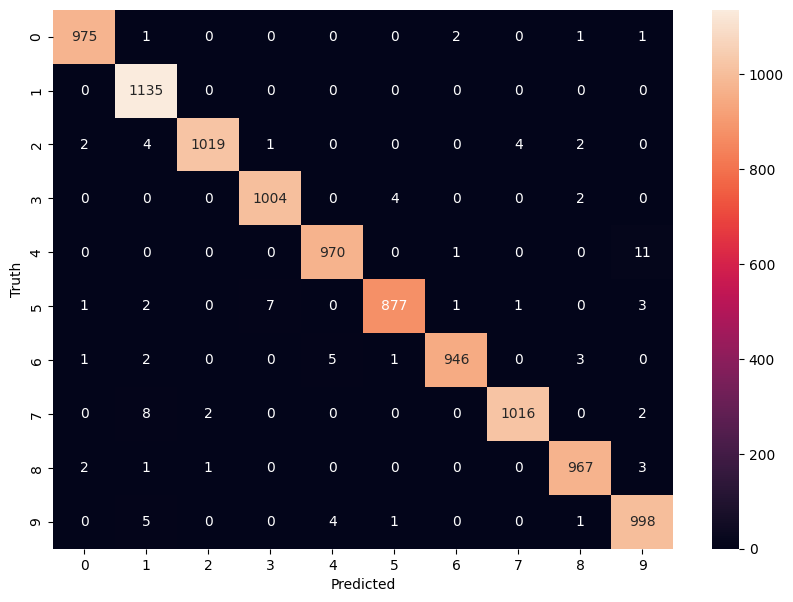

In [11]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


### **Making some predictions to test the model**

In [12]:
predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [13]:
predicted[0]

array([1.1475541e-08, 2.6281533e-10, 1.6990082e-07, 9.8679095e-08,
       9.8601722e-09, 1.6789953e-10, 2.6258466e-15, 9.9999887e-01,
       3.8224766e-09, 7.3660425e-07], dtype=float32)

In [14]:
np.argmax(predicted[5])

1

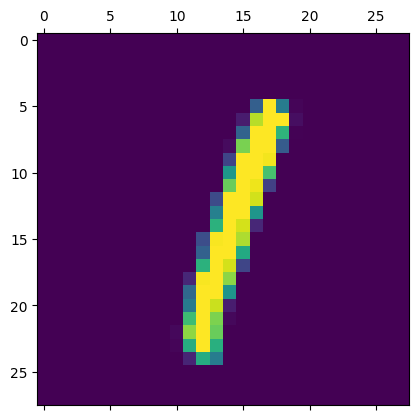

In [15]:
plt.matshow(X_test[5])